<a href="https://colab.research.google.com/github/YugyeongJo/study_AIs/blob/main/docs/quests/NLPs/classification_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사전작업

In [1]:
# 한글처리
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,559 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

### YN뉴스 모델 불러오기(pickle)

In [2]:
file_path = 'YNnewstitles_tfidfVectorizer.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  tfidfVectorizer_model = pickle.load(pickle_file)

In [4]:
file_path = 'YNnewstitle_randomForestClassifiers.pkl'

import pickle
with open(file_path, 'rb') as pickle_file:
  YNnewstitle_randomForestClassifier_model = pickle.load(pickle_file)

## 데이터 불러오기

In [7]:
import pandas as pd
df_ITnews = pd.read_excel("/content/IT News.xlsx", sheet_name=None)
len(df_ITnews)

46

In [8]:
df_sheets = []
for sheet_name, df in df_ITnews.items():
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

df_sheets[2]

2024-01-31, <class 'pandas.core.frame.DataFrame'>
2024-01-30, <class 'pandas.core.frame.DataFrame'>
2024-01-29, <class 'pandas.core.frame.DataFrame'>
2024-01-26, <class 'pandas.core.frame.DataFrame'>
2024-01-25, <class 'pandas.core.frame.DataFrame'>
2024-01-24, <class 'pandas.core.frame.DataFrame'>
2024-01-23, <class 'pandas.core.frame.DataFrame'>
2024-02-19, <class 'pandas.core.frame.DataFrame'>
2024-1-19, <class 'pandas.core.frame.DataFrame'>
2024-1-18, <class 'pandas.core.frame.DataFrame'>
2024-1-17, <class 'pandas.core.frame.DataFrame'>
2024-1-16, <class 'pandas.core.frame.DataFrame'>
2024-1-15, <class 'pandas.core.frame.DataFrame'>
2024-1-12, <class 'pandas.core.frame.DataFrame'>
2024-1-11, <class 'pandas.core.frame.DataFrame'>
2024-1-10, <class 'pandas.core.frame.DataFrame'>
2024-1-9, <class 'pandas.core.frame.DataFrame'>
2024-1-8, <class 'pandas.core.frame.DataFrame'>
2024-1-5, <class 'pandas.core.frame.DataFrame'>
2024-1-4, <class 'pandas.core.frame.DataFrame'>
2024-01-03, <cla

,이름,선호도 투표,뉴스명,문장 요약,한 줄평
0,문석천,NaN,"테슬라, 해킹 대회서 또 뚫렸다",테슬라가 해킹대회를 개최하였는데 한 보안업체 팀이 테슬라의 보안을 해킹하는데 성공했다.,기업이 본인들의 보안력을 강화하기 위해 오히려 해킹대회를 열어 그 피드백을 받아 다...
1,김유진,NaN,NaN,NaN,NaN
2,노주현,NaN,NaN,NaN,NaN
3,김하늘,NaN,NaN,NaN,NaN
4,박요한,NaN,NaN,NaN,NaN
5,오지수,NaN,NaN,NaN,NaN
6,김명준,NaN,"올해 바이오 3대 핵심 ""AI·비만치료제·ADC""",올해 주목할 만한 바이오산업의 핵심은 △AI(인공지능) △비만치료제(GLP-1) △...,현재 AI 반도체 시장을 독식하고 있는 엔비디아가 아닌 다른 회사들의 기술력이 올라...
7,공명윤,NaN,NaN,NaN,NaN
8,한동철,NaN,NaN,NaN,NaN
9,조유경,NaN,"‘스위프트 딥페이크’에 발칵... “MS의 AI가 만들고, X 통해 퍼졌다”","딥페이크 기술을 사용한 피해가 커지고 있어, 뒤늦게 딥페이크 규제에 들어갈 방향이다.",빠른 기술 발전은 실생활에 큰 도움을 주기도 하지만 이에 따른 법적인 규제도 함께 ...


## 데이터 전처리

In [9]:
for i in range(len(df_sheets)):
  df_sheets[i].drop(['선호도 투표'], axis=1, inplace=True)  # 선호도 투표 column 삭제
  df_sheets[i].dropna(inplace=True) # 남은 column기준으로 dropna
  if df_sheets[i].columns[0] != '이름': # 이상있는 column 수정
    df_sheets[i].rename(columns = {f'{df_sheets[i].columns[0]}':'이름'}, inplace=True)
df_sheets[8]

,이름,뉴스명,문장 요약,한 줄평
4,박요한,비트코인 시세 급락···한때 4만1000달러대 붕괴,19일 오전 4만600달러까지 하락…차익실현 매도\n‘가상자산 공포·탐욕 지수’는 ...,미국의 금리인하 기대풍조와 비트코인의 ETF 승인으로 인해 이미 평가 가치가 상승되...
6,김명준,유튜버 반려견 복제 논란…정말 키우던 개와 같을까,국내에서 반려견 복제를 중개하는 크리오아시아의 한형태 대표는 “황우석 전 서울대 교...,"현재의 연구팀에서는 표현형 이상은 완전히 설명할 수 없다라고 말한다는건. 즉, 특성..."


In [53]:
df_sheets[0].query('이름 == "조유경"')['뉴스명'].values.tolist()

['중고거래 플랫폼 구입 에어프라이어, 불량인데 판매자 연락도 안된다?']

In [55]:
# condition = '이름 == "조유경"'

# sentence = []
# for x in range(len(df_sheets)):
#   df_sheets_newtitles = df_sheets[x].query(condition)['뉴스명'].values.tolist()
#   sentence.extend(df_sheets_newtitles)

sentence = []
for x in range(len(df_sheets)):
  df_sheets_newtitles = df_sheets[x]['뉴스명'].values.tolist()
  sentence.extend(df_sheets_newtitles)

sentence

['개보위 "맞춤형 광고 개인정보 처리 투명성 높인다"',
 '카카오쇼핑 모바일 교환권, 삼성페이에서 쓴다',
 'AI로 인간추론능력 40% 높였다',
 '인간 뇌조직으로 컴퓨터 구축 성공',
 "주담대 갈아타기 대박 낸 네이버·카카오페이 '전월세대출 갈아타기' 출시",
 '"쇼핑몰 매장·화장실 위치 한눈에"…카카오맵, 실내지도 서비스',
 '뇌 안에 컴퓨터 있다... 머스크의 ‘뉴럴링크’, 칩 이식 성공',
 '중고거래 플랫폼 구입 에어프라이어, 불량인데 판매자 연락도 안된다?',
 '음악가 71% "AI로 생계 잃을 것" 우려…작사·작곡에는 활용',
 '내 콘텐츠로 무단학습하는 AI… 그림에 `독`타서 저작권 지킨다',
 '정보공개청구, 이제 AI가 돕는다…내용요약·처리방향까지 ‘척척’',
 '가우디오랩, AI 소음제거 기술 SXSW 혁신상에 올라',
 '[혁신스타트업 in 홍릉] 픽셀로 “눈 건강 관리, 안구 질환 예방하는 아이케어 솔루션”',
 '구글의 야망과 휴머노이드 시스템 ‘모바일 알로하’',
 '전원 켜진 日 달 탐사선 슬림, 암석 촬영 성공',
 "공정위, 플랫폼법 제정 속도...업계 '경쟁력 약화' 우려 고조",
 '"건강검진 사라진다"…삼성·애플도 경쟁하는 웨어러블 헬스케어[미래on]',
 '머스크의 뉴럴링크, 최초로 인간 뇌에 칩 이식…"첫 제품은 텔레파시"',
 '아이돌 챗봇으로 팬심 저격하는 넷마블',
 'NYT "챗GPT는 저작권 도둑"… 오픈AI·MS에 저작권 소송',
 'China approves over 40 AI mod-\nels for public use in six months',
 'AI로 난소암 확인하는 기술 개발',
 '테슬라, 해킹 대회서 또 뚫렸다',
 '올해 바이오 3대 핵심 "AI·비만치료제·ADC"',
 '‘스위프트 딥페이크’에 발칵... “MS의 AI가 만들고, X 통해 퍼졌다”',
 '돌봄로봇이 협심증으로 쓰러진 70대 입주민 신고해 구조',
 "KT, 'NFT' 접는다…블록체인 사업, 디지털 문서 중심으

### 형태소 분석기 Okt 사용

In [56]:
!pip install konlpy

In [57]:
from konlpy.tag import Okt
okt = Okt()

In [58]:
# pickle로 받아온 okt사용을 위해 숫자 삭제, 영문자 소문자로 통일 작업 실행
sentence = pd.Series(sentence)
sentence = sentence.str.replace('[0-9]', '', regex=True)
sentence = sentence.str.lower()
sentence

0                         개보위 "맞춤형 광고 개인정보 처리 투명성 높인다"
1                             카카오쇼핑 모바일 교환권, 삼성페이에서 쓴다
2                                     ai로 인간추론능력 % 높였다
3                                   인간 뇌조직으로 컴퓨터 구축 성공
4              주담대 갈아타기 대박 낸 네이버·카카오페이 '전월세대출 갈아타기' 출시
                            ...                       
316                                번가는 ai를 쇼핑에 어떻게 활용할
317    ai폰'정체성 담은 갤럭시 s.. 자체 인공지능은 물론 제미나이,gpt까지 탑재한다.
318                    스노우플레이크, 데이터 거래 플랫폼으로 데이터 판매 지원
319               메타버스 죽었다?…\n한쪽만 보셨군요, \n챗gpt와 만나면 빅뱅
320                ai가 공무원 문서 작성·민원대응 돕는다…행정서비스에 ai 적용
Length: 321, dtype: object

In [59]:
# 조사, 어미, 구두점 같은 것을 제거
def okt_clean(sentence):
  sentence_list = []
  for sentence_word in sentence :
    sentence_clean = []
    for word in okt.pos(sentence_word, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation', 'Foreign', 'url']:
            sentence_clean.append(word[0])
    sentence_list.append(" ".join(sentence_clean))
  return sentence_list

In [60]:
okt.pos('동의 없이 기사 읽다 똑똑하다 ai 韓 저작권 전쟁 시작 돼다 팩 플', stem=True)

[('동의', 'Noun'),
 ('없이', 'Adverb'),
 ('기사', 'Noun'),
 ('읽다', 'Verb'),
 ('똑똑하다', 'Adjective'),
 ('ai', 'Alpha'),
 ('韓', 'Foreign'),
 ('저작권', 'Noun'),
 ('전쟁', 'Noun'),
 ('시작', 'Noun'),
 ('돼다', 'Verb'),
 ('팩', 'Noun'),
 ('플', 'Exclamation')]

In [61]:
sentence_clean = okt_clean(sentence)
sentence_clean

['개 보위 맞춤 형 광고 개인정보 처리 투명 성 높이다',
 '카카오 쇼핑 모바일 교환 권 삼 성 페이 쓴다',
 'ai 로 인간 추론 능력 높이다',
 '인간 뇌 조직 컴퓨터 구축 성공',
 '주 담대 갈아타다 대박 내다 네이버 카카오 페이 전월세 대출 갈아타다 출시',
 '쇼핑몰 매장 화장실 위치 한눈 카카오 맵 실내 지도 서비스',
 '뇌 안 컴퓨터 있다 머스크 뉴럴 링크 칩 이식 성공',
 '중고 거래 플랫폼 구입 에어 프라이어 불량 판매 자 연락 안되다',
 '음악가 ai 로 생계 잃다 것 우려 작사 작곡 활용',
 '내 콘텐츠 무단 학습 하 ai 그림 독 타다 저작권 지키다',
 '정보공개 청구 이제 ai 가다 돕다 내용 요약 처리 방향 척척',
 '가우디 오 랩 ai 소음 제거 기술 sxsw 혁신 상 오르다',
 '혁신 스타트업 in 홍릉 픽셀 눈 건강 관리 안구 질환 예방 하다 아이 케어 솔루션',
 '구글 야망 휴머노이드 시스템 모바일 알로하',
 '전원 켜지다 달 탐사선 슬림 암석 촬영 성공',
 '공정위 플랫폼 법 제정 속도 업계 경쟁력 약화 우려 고조',
 '건강검진 사라지다 삼성 애플 경쟁 하다 웨어 러블 헬 스케 어 미래 on',
 '머스크 뉴럴 링크 최초 인간 뇌 칩 이식 첫 제품 텔레파시',
 '아이돌 챗봇 팬심 저격 하다 넷마블',
 'nyt 챗 gpt 늘다 저작권 도둑 오픈 ai ms 저작권 소송',
 'china approves over ai mod els for public use in six months',
 'ai 로 난소암 확인 하다 기술 개발',
 '테슬라 해킹 대회 또 뚫리다',
 '올해 바이오 대다 핵심 ai 비만 치료 제 adc',
 '스위프트 딥 페이크 발칵 ms 의 ai 가다 만들다 x 통해 퍼지다',
 '돌보다 로봇 협심증 쓰러지다 대다 입 주민 신고 하다 구조',
 'kt nft 접다 블록 체인 사업 디지털 문서 중심 재편',
 '유럽 아이폰 이용자 앱스토어 다른 앱 마켓 써다 되다',
 '노화 막다 젊

## 모델 적용

In [62]:
# Tokenizing
sentence_tokens = tfidfVectorizer_model.transform(sentence_clean)
sentence_tokens.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
# predict
predict_cate = YNnewstitle_randomForestClassifier_model.predict(sentence_tokens.toarray())
predict_cate

array([2., 0., 0., 0., 1., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 5.,
       0., 1., 2., 0., 0., 0., 0., 2., 0., 3., 0., 1., 0., 0., 0., 5., 2.,
       0., 2., 0., 1., 0., 2., 0., 0., 0., 0., 1., 2., 2., 2., 2., 0., 2.,
       1., 0., 3., 0., 1., 1., 0., 6., 2., 0., 0., 1., 0., 3., 1., 0., 0.,
       0., 0., 0., 0., 4., 3., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       2., 2., 0., 1., 0., 0., 0., 0., 1., 1., 0., 4., 0., 0., 0., 0., 2.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 6., 0., 0., 0., 3., 2., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 3., 0., 2., 0., 0., 0., 0., 0., 0., 3.,
       0., 1., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 2., 1., 0., 0.,
       6., 0., 0., 0., 1., 0., 2., 0., 4., 4., 0., 0., 6., 0., 0., 6., 0.,
       0., 0., 0., 2., 6., 2., 0., 0., 2., 0., 0., 0., 4., 0., 0., 0., 2.,
       0., 2., 0., 0., 2.

## wordcloud 만들기

In [64]:
topic_dict = pd.read_csv('topic_dict.csv')
topic_dict

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [65]:
predict_topic_list = []
for j in predict_cate:
  topic = topic_dict.query(f"topic_idx=={j}")['topic'].values[0]
  predict_topic_list.append(topic)
predict_topic_list

['사회',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '스포츠',
 'IT과학',
 '경제',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '사회',
 'IT과학',
 '생활문화',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 'IT과학',
 '스포츠',
 '사회',
 'IT과학',
 '사회',
 'IT과학',
 '경제',
 'IT과학',
 '사회',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 '사회',
 '사회',
 '사회',
 '사회',
 'IT과학',
 '사회',
 '경제',
 'IT과학',
 '생활문화',
 'IT과학',
 '경제',
 '경제',
 'IT과학',
 '정치',
 '사회',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 '생활문화',
 '경제',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '세계',
 '생활문화',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT과학',
 'IT과학',
 '세계',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 'IT과학',
 '경제',
 'IT과학',
 'IT

In [66]:
from wordcloud import WordCloud

In [67]:
from collections import Counter
text_split_count = Counter(predict_topic_list)
text_split_count

Counter({'사회': 46,
         'IT과학': 217,
         '경제': 28,
         '스포츠': 2,
         '생활문화': 13,
         '정치': 7,
         '세계': 8})

In [68]:
wordCloud = WordCloud(background_color='white'
                    , font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
wordCloud.generate_from_frequencies(text_split_count)

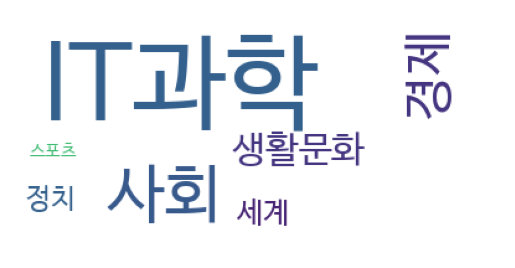

In [69]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()